# Description
This notebook provides a workspace and a few functions for designing color schemes.

If you design a scheme you think is worth keeping, consider adding it to `matplotlib.stylelib.colorschemes`.

In [2]:
from collections import Iterable
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import mackelab.stylelib.colorschemes as cs
from mackelab.colors import *

%matplotlib inline

[monochrome_palette]: value was greater than 1 and was clipped.


In [2]:
colours = ['#113F65', '#9D3B11', '#458B0F', '#7E0E4D']
default = [prop['color'] for prop in mpl.rcParams['axes.prop_cycle']]

    def value_profile(clist, style=None):
        """
        Plot the value profile of a color map. Ensuring each colour
        has a different values helps make the colors distinguishable
        even in grey scale.
        It also helps that the value progression be monotonous, that way
        legends go from e.g. light to dark.

        Parameters
        ----------
        clist: colour list
        style: str | None
            Either 'line' or 'scatter'. If None, style is chosen automatically.
        """
        if style is None:
            style = 'line' if len(clist) >= 8 else 'scatter'
        ax = plt.subplot(111)
        if style == 'line':
            ax.plot(get_value(clist))
        else:
            ax.scatter(range(len(clist)), get_value(clist))
            
    def show_colors(colors, ax=None):
        #if (isinstance(colors, (str, bytes))
        #    or not isinstance(colors, Iterable)):
        #    colors = [colors]
        rowheight = 1.5  # Height of a color row in inches
        colors = np.atleast_1d(colors)
        if ax is None:
            ax = plt.gca()
        fig = ax.get_figure()
        if colors.ndim == 2:
            # Multiple color lists
            ax.remove()
            for i, row in enumerate(colors):
                ax = plt.subplot(len(colors),1,i+1)
                show_colors(row, ax=ax)
            fig.set_figheight(len(colors)*rowheight)
        else:
            fig.set_figheight(rowheight)
            ax.set_axis_off()
            w = 1/len(colors); h = 1
            for i, c in enumerate(colors):
                rect = Rectangle((i*w,0), w, h, color=c)
                ax.add_patch(rect);
            return ax

In [ ]:
value_profile = plot_value_profile
show_colors = display_palette

In [12]:
fig.set_figheight?

Signature: fig.set_figheight(val, forward=False)
Docstring:
Set the height of the figure in inches

ACCEPTS: float
File:      ~/usr/venv/mackelab/lib64/python3.6/site-packages/matplotlib/figure.py
Type:      method


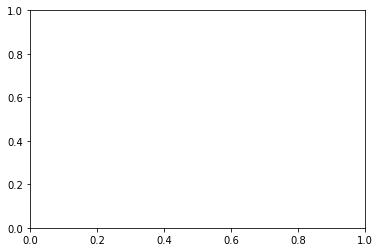

In [13]:
ax = plt.subplot(111)

In [130]:
def test_line_plot(colors, ax=None):
    if ax is None: ax = plt.gca()
    ax.set_axis_off()
    xarr = np.linspace(0, 2, 300)
    for i, c in enumerate(colors, start=1):
        ω = 1.3 * i
        ax.plot(xarr, np.cos(ω*xarr*2*np.pi), color=c)
        
def test_scatter_plot(colors, ax=None, npoints=20, markersize=8, s=None):
    if ax is None: ax = plt.gca()
    if s is None: s = markersize
    for spine in ax.spines.values(): spine.set_visible(False)
    for c in colors:
        xarr, yarr = np.random.normal(0, 1, size=(2,npoints))
        ax.scatter(xarr, yarr, color=c, s=s)
    ax.legend("abcdefghijkl"[:len(colors)])
    ax.set_axis_off()

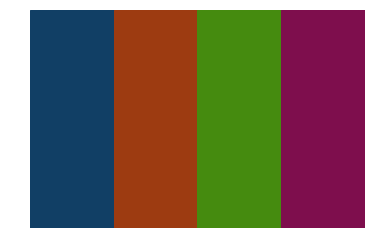

In [32]:
show_colors(colours);

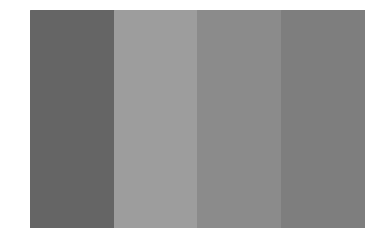

In [46]:
show_colors(desaturate(colours, 1))

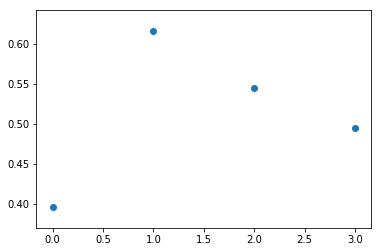

In [51]:
value_profile(colours)

In [52]:
blue, orange, green, purple = colours

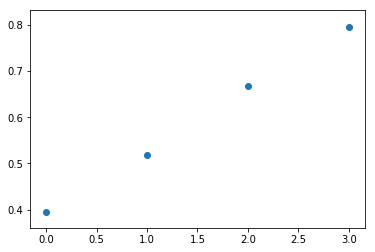

In [128]:
newcolours = [lighten(blue, .0), lighten(orange, -.1),
              lighten(green, .12), lighten(purple, .3)]
value_profile(newcolours)

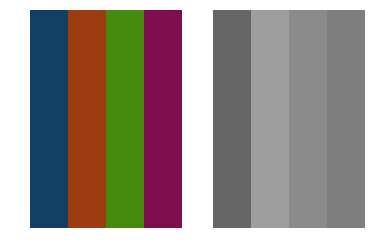

In [101]:
plt.subplot(121)
show_colors(colours)
plt.subplot(122)
show_colors(greyscale(colours))

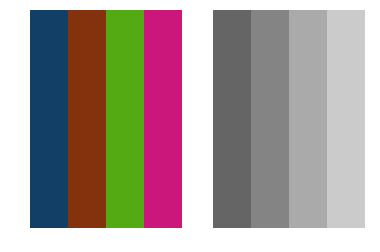

In [129]:
plt.subplot(121)
show_colors(newcolours)
plt.subplot(122)
show_colors(greyscale(newcolours))

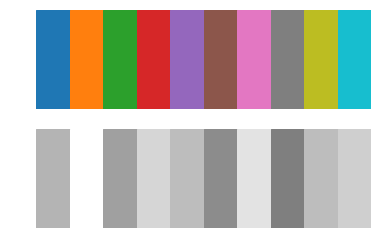

In [20]:
show_colors([default, greyscale(default)])

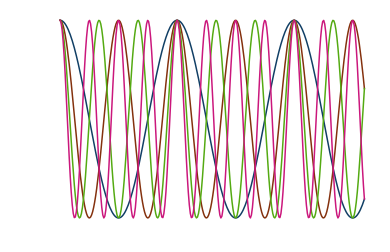

In [130]:
#plt.figure(figsize=(9,4))
#plt.subplot(121)
#test_line_plot(colours)
#plt.subplot(122)
test_line_plot(newcolours)

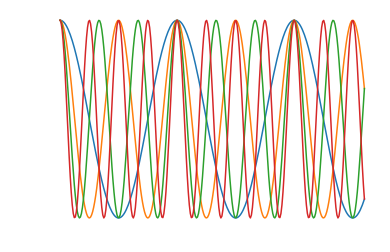

In [99]:
test_line_plot(default[:4])

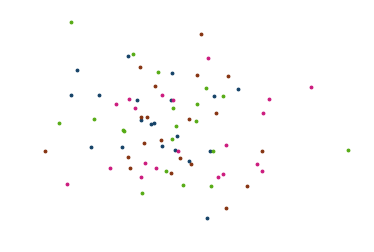

In [141]:
test_scatter_plot(newcolours, npoints=20, markersize=8)

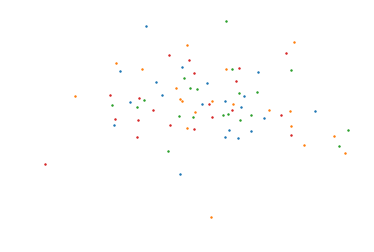

In [136]:
test_scatter_plot(default[:4])

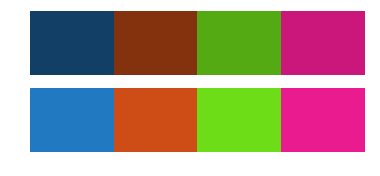

In [178]:
plt.subplot(311)
show_colors(newcolours)
plt.subplot(312)
show_colors(lighten(newcolours, .6, relative=True))
#plt.subplot(313)
#show_colors(lighten(newcolours, .6, relative=True))

In [198]:
bgcolours = desaturate(lighten(newcolours, .5, relative=True), .2)
#bgcolours[2] = desaturate(bgcolours[2], .1)
bgcolours[3] = desaturate(bgcolours[3], .2)

In [8]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

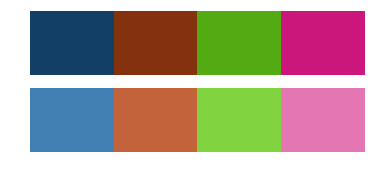

In [199]:
plt.subplot(311)
show_colors(newcolours)
plt.subplot(312)
show_colors(bgcolours)

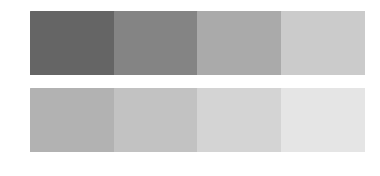

In [203]:
plt.subplot(311)
show_colors(greyscale(newcolours))
plt.subplot(312)
show_colors(greyscale(bgcolours))

In [201]:
newcolours

['#113f65', '#84310e', '#54aa12', '#cb177c']

In [202]:
bgcolours

['#427fb2', '#c2633c', '#81d440', '#e576b4']

In [21]:
colours = ['#113f65', '#84310e', '#54aa12', '#cb177c']
colours_light = ['#427fb2', '#c2633c', '#81d440', '#e576b4']

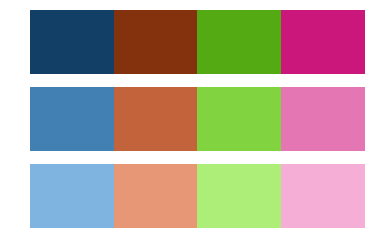

In [33]:
colours_very_light = desaturate(lighten(colours_light, .6, relative=True), .2)
show_colors([colours, colours_light, colours_very_light])

In [34]:
colours_very_light

['#80b4e0', '#e79775', '#acee78', '#f5afd6']

In [35]:
colours = ['#113f65', '#84310e', '#54aa12', '#cb177c', '#F8BE2F', '#6F49BA']
colours_light = ['#427fb2', '#c2633c', '#81d440', '#e576b4']

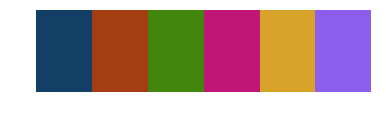

In [94]:
_colours = colours[:]
_colours[4] = darken(_colours[4], 0.05)
for i in range(1, 5):
    _colours[i] = darken(_colours[i], (i**2)*0.005)
_colours[5] = lighten(_colours[5], 0.2)
_colours[1] = lighten(_colours[1], 0.13)
_colours[2] = darken(_colours[2], 0.12)
show_colors(_colours);

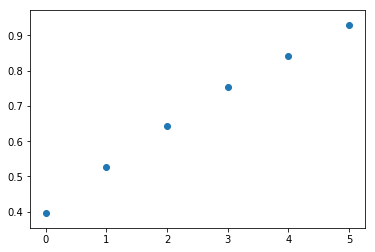

In [95]:
plt.scatter(np.arange(len(_colours)), sorted(get_value(_colours)))

In [96]:
_colours

['#113f65', '#a43d12', '#42860e', '#c01675', '#d7a429', '#8d5ded']

In [97]:
colours = ['#113f65', '#a43d12', '#42860e', '#c01675', '#d7a429', '#8d5ded']

['#658fb2', '#d2896b', '#8cc262', '#d36ca6', '#e3c886', '#d1c0f2']

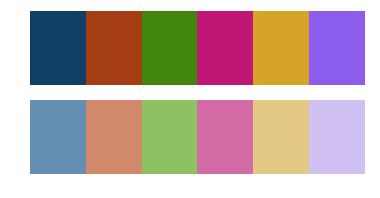

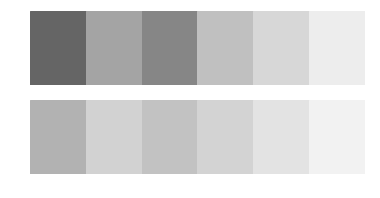

In [121]:
_colours_l = colours[:]
_colours_l[:3] = desaturate(lighten(_colours_l[:3], 0.5, relative=True), .4)
_colours_l[3:] = desaturate(lighten(_colours_l[3:], 0.3, relative=True), .4)
plt.figure()
show_colors([colours, _colours_l])
plt.figure()
show_colors([greyscale(colours), greyscale(_colours_l)])
_colours_l

In [122]:
colours = ['#113f65', '#a43d12', '#42860e', '#c01675', '#d7a429', '#8d5ded']
colours_light = ['#658fb2', '#d2896b', '#8cc262', '#d36ca6', '#e3c886', '#d1c0f2']

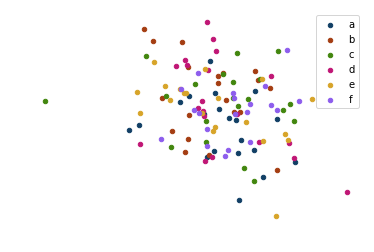

In [131]:
test_scatter_plot(colours, s=20)